### Цилиндрическая лоскутная поверхность(The NURBS Book 1998, стр. 40-43)

In [46]:
"""
Для начала нужно написать программу для вычисления одной точки и свериться с вычислениями в книге.
Для этого в примере предлагется использовать алгоритм де Кастельжо для вычисления точки,
его же можно использовать для вычисления всей поверхности.
--------------------------------------------------------------------------------------------------------------------------------------------
deCasteljau2(P,n,m,u0,v0,S)
{ /* Вычисление  точку  на  поверхности  Безье. */
/* по  де Кастельжо */
/* Вход: P,n,m,u0,v0 */
/* Выход: S */
If (n <= m)
   {
   for (j=0; j<=n; j++)  /* P[j][]  это  j-тая  строка */
      deCasteljau1(P[j][],n,u0,Q[j]);
   deCasteljau1(Q,m,v0,S);
   }
else
   {
   for (i=0; i<=n; i++)
      deCasteljau1(P[][i],m,v0,Q[j]);
   deCasteljau1(Q,n,u0,S);
   }
}
-------------------------------------------------------------------------------------------------------------------------------------------------
"""

def deCasteljau1(points, degree, t):
    """
    Вычисляет точку на кривой Безье методом де Кастельжо для одномерного массива точек.

    Аргументы:
    points: Массив точек, для которого вычисляется кривая Безье.
    degree: Степень кривой (размер массива - 1).
    t: Параметр, определяющий точку на кривой (обычно от 0 до 1).

    Возвращает:
    Результирующую точку на кривой Безье в заданном параметре t.
    """
    for r in range(1, degree + 1):
        for i in range(degree - r + 1):
            points[i] = tuple((1 - t) * points[i][k] + t * points[i + 1][k] for k in range(len(points[i])))
    return points[0]

def deCasteljau2(P, n, m, u0, v0):
    """
    Вычисляет точку на цилиндрической лоскутной поверхности методом де Кастельжо.

    Аргументы:
    P: Трехмерный массив контрольных точек.
    n: Степень поверхности по направлению u.
    m: Степень поверхности по направлению v.
    u0: Параметр u, определяющий точку на поверхности.
    v0: Параметр v, определяющий точку на поверхности.

    Возвращает:
    Результирующую точку на поверхности Безье в точке (u0, v0).
    """
    Q = [[0] * (m + 1) for _ in range(n + 1)]
    
    if n <= m:
        for j in range(n + 1):
            Q[j] = deCasteljau1([P[j][i] for i in range(m + 1)], m, v0)
        S = deCasteljau1(Q, n, u0)
    else:
        for i in range(n + 1):
            Q[i] = deCasteljau1([P[j][i] for j in range(m + 1)], m, v0)
        S = deCasteljau1(Q, n, u0)
    
    # Нормализация результирующей точки
    w = S[-1]
    S = tuple(coord / w for coord in S[:-1])
    
    return S

# Пример использования:

# Контрольные точки P для направления u и v
P = [
    [(1, 1, 0, 1), (1, 1, 1, 1), (2, 0, 2, 2)],
    [(-1, 1, 0, 1), (-1, 1, 1, 1), (-2, 0, 2, 2)]
]

# Степени поверхности
n = 2
m = 1

# Параметры u и v для вычисления точки
u0 = 0.5
v0 = 0.5

# Вычисление точки на поверхности Безье в точке (u0, v0)
result = deCasteljau2(P, n, m, u0, v0)
print(f"Точка S({u0}, {v0}): {result}")


Точка S(0.5, 0.5): (0.0, 0.6, 0.8)


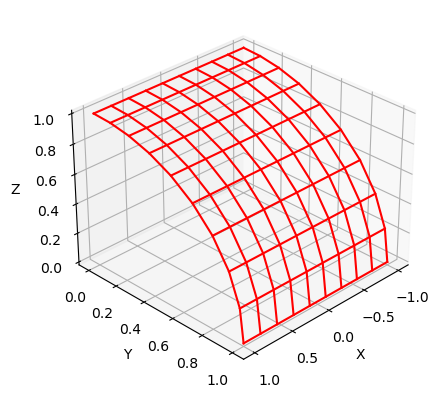

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def deCasteljau1(points, degree, t):
    """
    Вычисление точки на кривой Безье методом де Кастельжо для одномерного массива точек.
    
    points: Список точек.
    degree: Степень кривой.
    t: Параметр t (от 0 до 1).
    """
    for r in range(1, degree + 1):
        for i in range(degree - r + 1):
            points[i] = tuple((1 - t) * points[i][k] + t * points[i + 1][k] for k in range(len(points[i])))
    return points[0]

def deCasteljau2(P, n, m, u, v):
    """
    Вычисление точки на поверхности Безье методом де Кастельжо.
    
    P: Массив контрольных точек.
    n: Степень поверхности по направлению u.
    m: Степень поверхности по направлению v.
    u, v: Параметры u и v (от 0 до 1).
    """
    Q = [[0] * (m + 1) for _ in range(n + 1)]
    
    if n <= m:
        for j in range(n + 1):
            Q[j] = deCasteljau1([P[j][i] for i in range(m + 1)], m, v)
        S = deCasteljau1(Q, n, u)
    else:
        for i in range(n + 1):
            Q[i] = deCasteljau1([P[j][i] for j in range(m + 1)], m, v)
        S = deCasteljau1(Q, n, u)
    
    w = S[-1]
    S = tuple(coord / w for coord in S[:-1])
    
    return S

def compute_surface_points(P, n, m, u_steps, v_steps):
    """
    Вычисление точек на поверхности Безье.
    
    P: Массив контрольных точек.
    n: Степень поверхности по направлению u.
    m: Степень поверхности по направлению v.
    u_steps, v_steps: Количество шагов по параметрам u и v.
    
    Возвращает двумерный массив точек на поверхности.
    """
    surface_points = []

    for u in np.linspace(0, 1, u_steps):
        row = []
        for v in np.linspace(0, 1, v_steps):
            point = deCasteljau2(P, n, m, u, v)
            row.append(point)
        surface_points.append(row)
    
    return surface_points

def plot_surface_with_sliders(surface_points, azim=45, elev=30):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for row in surface_points:
        x = [point[0] for point in row]
        y = [point[1] for point in row]
        z = [point[2] for point in row]
        ax.plot(x, y, z, color='red')

    for j in range(len(surface_points[0])):
        x = [surface_points[i][j][0] for i in range(len(surface_points))]
        y = [surface_points[i][j][1] for i in range(len(surface_points))]
        z = [surface_points[i][j][2] for i in range(len(surface_points))]
        ax.plot(x, y, z, color='red')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(azim=azim, elev=elev)
    
    plt.show()



P = [
    [(1, 1, 0, 1), (1, 1, 1, 1), (2, 0, 2, 2)],
    [(-1, 1, 0, 1), (-1, 1, 1, 1), (-2, 0, 2, 2)]
]

n = 2
m = 1

u_steps = 10
v_steps = 10

surface_points = compute_surface_points(P, n, m, u_steps, v_steps)

# Указываем фиксированные значения для азимута и угла подъема
azim = 45
elev = 30

plot_surface_with_sliders(surface_points, azim, elev)